Importar librerías

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Dataset de ejemplo

In [2]:
ejemplos = [
    {"texto": "entregar informe final", "clase": "alta"},
    {"texto": "actualizar software de seguridad", "clase": "alta"},
    {"texto": "responder correos importantes", "clase": "alta"},
    {"texto": "hacer copia de seguridad", "clase": "alta"},
    {"texto": "verificar backup del servidor", "clase": "alta"},
    {"texto": "renovar licencia del software", "clase": "alta"},
    {"texto": "preparar presentación mensual", "clase": "alta"},
    {"texto": "Envía el informe financiero mensual al gerente general", "clase": "alta"},
    {"texto": "Realiza la copia de seguridad de la base de datos principal", "clase": "alta"},
    {"texto": "Responde al cliente sobre la queja presentada hoy", "clase": "alta"},
    {"texto": "Renueva la licencia del antivirus del servidor central", "clase": "alta"},
    {"texto": "Organiza reunión urgente con el equipo de desarrollo", "clase": "alta"},
    {"texto": "Actualiza la política de seguridad de la empresa", "clase": "alta"},
    {"texto": "Notifica a todos los empleados sobre el cambio de horario", "clase": "alta"},
    {"texto": "Aprueba las facturas pendientes antes del cierre del mes", "clase": "alta"},
    {"texto": "Gestiona el pago de impuestos trimestrales", "clase": "alta"},
    {"texto": "Envía el informe de auditoría a la dirección", "clase": "alta"},
    {"texto": "Cambia la contraseña de acceso al servidor crítico", "clase": "alta"},
    {"texto": "Responde la solicitud urgente del proveedor principal", "clase": "alta"},
    {"texto": "Coordina la entrega del proyecto al cliente", "clase": "alta"},
    {"texto": "Verifica el correcto funcionamiento del sistema de respaldo", "clase": "alta"},
    {"texto": "Envia los datos solicitados por la entidad reguladora", "clase": "alta"},
    {"texto": "Resuelve el ticket de soporte con prioridad máxima", "clase": "alta"},
    {"texto": "Reporta el incidente de seguridad detectado en la red", "clase": "alta"},
    {"texto": "Solicita autorización para la compra de equipos críticos", "clase": "alta"},
    {"texto": "Revisa y firma el contrato de confidencialidad", "clase": "alta"},
    {"texto": "Asegura el cumplimiento del plazo de entrega del producto", "clase": "alta"},
    {"texto": "Comunica el cierre temporal de la oficina principal", "clase": "alta"},
    {"texto": "Ejecuta el plan de contingencia ante caída del sistema", "clase": "alta"},
    {"texto": "Notifica a los clientes sobre los cambios en el servicio", "clase": "alta"},
    {"texto": "Recopila información para la auditoría externa", "clase": "alta"},
    {"texto": "Confirma el pago de la nómina de empleados", "clase": "alta"},
    {"texto": "Valida la actualización de la plataforma de ventas", "clase": "alta"},
    {"texto": "Realiza el cierre contable mensual", "clase": "alta"},
    {"texto": "Prepara la presentación para la junta directiva", "clase": "alta"},
    {"texto": "Entrega el resumen ejecutivo al CEO", "clase": "alta"},
    {"texto": "Elabora el reporte de incidentes críticos del mes", "clase": "alta"},
    {"texto": "Gestiona la renovación del seguro empresarial", "clase": "alta"},
    {"texto": "Revisa la integridad de los datos migrados", "clase": "alta"},
    {"texto": "Supervisa la implementación de los nuevos controles de acceso", "clase": "alta"},
    {"texto": "Coordina con el área legal la revisión de contratos", "clase": "alta"},
    {"texto": "Reestablece la conexión de red para el área de finanzas", "clase": "alta"},
    {"texto": "Gestiona la respuesta ante la auditoría interna", "clase": "alta"},
    {"texto": "Solicita la aprobación del presupuesto anual", "clase": "alta"},
    {"texto": "Responde al requerimiento judicial recibido", "clase": "alta"},
    {"texto": "Activa el protocolo de emergencias por caída eléctrica", "clase": "alta"},
    {"texto": "Registra el informe de daños ante el seguro", "clase": "alta"},
    {"texto": "Notifica la llegada de materiales críticos al almacén", "clase": "alta"},
    {"texto": "Gestiona la apertura de una nueva sucursal", "clase": "alta"},
    {"texto": "Asegura la disponibilidad de recursos para el lanzamiento", "clase": "alta"},
    {"texto": "Confirma la reserva de la sala de conferencias para la junta", "clase": "alta"},
    {"texto": "Responde la notificación de inspección sanitaria", "clase": "alta"},
    {"texto": "Solicita refuerzos para el área de soporte técnico", "clase": "alta"},
    {"texto": "Aprueba la contratación del personal temporal", "clase": "alta"},
    {"texto": "Revisa y actualiza los procedimientos de evacuación", "clase": "alta"},
    {"texto": "Elabora el plan de acción para la recuperación de desastres", "clase": "alta"},
    {"texto": "Supervisa la migración de servidores críticos", "clase": "alta"},
    {"texto": "Prepara el reporte financiero para la junta extraordinaria", "clase": "alta"},
    {"texto": "Actualiza las credenciales de acceso a sistemas sensibles", "clase": "alta"},
    {"texto": "Informa a la dirección sobre el estado del proyecto urgente", "clase": "alta"},
    {"texto": "llamar al cliente", "clase": "media"},
    {"texto": "organizar reunión con equipo", "clase": "media"},
    {"texto": "pagar facturas", "clase": "media"},
    {"texto": "agendar cita médica", "clase": "media"},
    {"texto": "Agendar cita médica para el próximo mes", "clase": "media"},
    {"texto": "Actualizar el calendario de vacaciones del equipo", "clase": "media"},
    {"texto": "Revisar y archivar documentos de la semana", "clase": "media"},
    {"texto": "Planificar la reunión mensual de seguimiento", "clase": "media"},
    {"texto": "Enviar recordatorio de tareas pendientes al equipo", "clase": "media"},
    {"texto": "Actualizar los datos de contacto de proveedores", "clase": "media"},
    {"texto": "Revisar los resultados del último sondeo interno", "clase": "media"},
    {"texto": "Preparar la agenda para la próxima reunión", "clase": "media"},
    {"texto": "Solicitar cotización para insumos de oficina", "clase": "media"},
    {"texto": "Actualizar el organigrama en la intranet", "clase": "media"},
    {"texto": "Completar curso de capacitación en línea", "clase": "media"},
    {"texto": "Redactar el boletín informativo mensual", "clase": "media"},
    {"texto": "Revisar informes de desempeño trimestrales", "clase": "media"},
    {"texto": "Actualizar el manual de procedimientos internos", "clase": "media"},
    {"texto": "Coordinar la limpieza general de la oficina", "clase": "media"},
    {"texto": "Verificar el estado de las computadoras del área", "clase": "media"},
    {"texto": "Enviar felicitaciones de cumpleaños al personal", "clase": "media"},
    {"texto": "Revisar el inventario de materiales de oficina", "clase": "media"},
    {"texto": "Solicitar mantenimiento preventivo para el aire acondicionado", "clase": "media"},
    {"texto": "Actualizar la lista de clientes activos", "clase": "media"},
    {"texto": "Revisar el calendario de capacitaciones", "clase": "media"},
    {"texto": "Preparar la lista de asistentes para el evento", "clase": "media"},
    {"texto": "Confirmar asistencia a la conferencia anual", "clase": "media"},
    {"texto": "Actualizar la base de datos de proveedores", "clase": "media"},
    {"texto": "Solicitar actualización de datos bancarios a empleados", "clase": "media"},
    {"texto": "Supervisar la impresión de material promocional", "clase": "media"},
    {"texto": "Enviar encuesta de satisfacción a los clientes", "clase": "media"},
    {"texto": "Revisar el estado de las solicitudes internas", "clase": "media"},
    {"texto": "Actualizar la lista de extensión telefónica", "clase": "media"},
    {"texto": "Organizar el archivo físico del área administrativa", "clase": "media"},
    {"texto": "Preparar la minuta de la última reunión", "clase": "media"},
    {"texto": "Solicitar confirmación de recepción de documentos", "clase": "media"},
    {"texto": "Actualizar la página web institucional", "clase": "media"},
    {"texto": "Supervisar la limpieza de las áreas comunes", "clase": "media"},
    {"texto": "Verificar el funcionamiento de la impresora principal", "clase": "media"},
    {"texto": "Actualizar la lista de correos del grupo de trabajo", "clase": "media"},
    {"texto": "Revisar el manual de uso del software", "clase": "media"},
    {"texto": "Solicitar informe de estado de los proyectos activos", "clase": "media"},
    {"texto": "Supervisar la entrega de uniformes nuevos", "clase": "media"},
    {"texto": "Revisar y responder mensajes del buzón general", "clase": "media"},
    {"texto": "Actualizar la firma de correo institucional", "clase": "media"},
    {"texto": "Preparar el informe mensual de asistencia", "clase": "media"},
    {"texto": "Planificar la charla de capacitación del trimestre", "clase": "media"},
    {"texto": "Revisar los acuerdos pendientes del comité", "clase": "media"},
    {"texto": "Actualizar la información de la página de empleados", "clase": "media"},
    {"texto": "Solicitar actualización de software no urgente", "clase": "media"},
    {"texto": "Redactar resumen de actividades semanales", "clase": "media"},
    {"texto": "Verificar la lista de invitados al evento", "clase": "media"},
    {"texto": "Preparar el material para la capacitación de personal", "clase": "media"},
    {"texto": "Revisar la agenda de la próxima semana", "clase": "media"},
    {"texto": "Actualizar datos del registro interno de activos", "clase": "media"},
    {"texto": "Confirmar entrega de materiales de oficina", "clase": "media"},
    {"texto": "Revisar memes en redes sociales", "clase": "baja"},
    {"texto": "Buscar recetas nuevas para la cena", "clase": "baja"},
    {"texto": "Leer artículos de entretenimiento online", "clase": "baja"},
    {"texto": "Consultar el horóscopo del día", "clase": "baja"},
    {"texto": "Ver videos de gatos en internet", "clase": "baja"},
    {"texto": "Organizar escritorio personal", "clase": "baja"},
    {"texto": "Buscar fondos de pantalla para el computador", "clase": "baja"},
    {"texto": "Descargar música para la oficina", "clase": "baja"},
    {"texto": "Hacer listas de compras no urgentes", "clase": "baja"},
    {"texto": "Leer noticias de farándula", "clase": "baja"},
    {"texto": "Explorar nuevas aplicaciones en el teléfono", "clase": "baja"},
    {"texto": "Actualizar fotos de perfil en redes sociales", "clase": "baja"},
    {"texto": "Revisar ofertas en tiendas online", "clase": "baja"},
    {"texto": "Buscar ideas para decorar el escritorio", "clase": "baja"},
    {"texto": "Leer mensajes antiguos en el chat personal", "clase": "baja"},
    {"texto": "Ver trailers de películas próximas a estrenar", "clase": "baja"},
    {"texto": "Buscar frases motivacionales para el día", "clase": "baja"},
    {"texto": "Actualizar playlist personal de Spotify", "clase": "baja"},
    {"texto": "Revisar estados de amigos en WhatsApp", "clase": "baja"},
    {"texto": "Ver galerías de fotos de viajes", "clase": "baja"},
    {"texto": "Buscar nuevos gadgets tecnológicos", "clase": "baja"},
    {"texto": "Revisar tutoriales de hobbies", "clase": "baja"},
    {"texto": "Leer blogs de moda y estilo", "clase": "baja"},
    {"texto": "Buscar chistes para compartir", "clase": "baja"},
    {"texto": "Ver el clima para la próxima semana", "clase": "baja"},
    {"texto": "Hacer tests de personalidad en línea", "clase": "baja"},
    {"texto": "Ver rankings de series populares", "clase": "baja"},
    {"texto": "Buscar imágenes divertidas en Pinterest", "clase": "baja"},
    {"texto": "Explorar nuevas funciones del teléfono", "clase": "baja"},
    {"texto": "Leer reseñas de restaurantes", "clase": "baja"},
    {"texto": "Actualizar fondo de pantalla del celular", "clase": "baja"},
    {"texto": "Explorar nuevas tendencias en TikTok", "clase": "baja"},
    {"texto": "Ver rutinas de ejercicios ligeros en YouTube", "clase": "baja"},
    {"texto": "Buscar inspiración para escribir frases", "clase": "baja"},
    {"texto": "Leer cómics online", "clase": "baja"},
    {"texto": "Ver videos de cocina saludable", "clase": "baja"},
    {"texto": "Explorar filtros de fotos en Instagram", "clase": "baja"},
    {"texto": "Buscar ideas para regalos originales", "clase": "baja"},
    {"texto": "Descargar aplicaciones de juegos", "clase": "baja"},
    {"texto": "Leer comentarios en foros de cine", "clase": "baja"},
    {"texto": "Ver galerías de arte en línea", "clase": "baja"},
    {"texto": "Buscar tips para plantas de interior", "clase": "baja"},
    {"texto": "Ver horarios de partidos de fútbol", "clase": "baja"},
    {"texto": "Explorar podcasts de entretenimiento", "clase": "baja"},
    {"texto": "Buscar frases célebres para reflexionar", "clase": "baja"},
    {"texto": "Leer historietas online", "clase": "baja"},
    {"texto": "Ver videos de animales curiosos", "clase": "baja"},
    {"texto": "Explorar menús de restaurantes cercanos", "clase": "baja"},
    {"texto": "Buscar wallpapers para el móvil", "clase": "baja"},
    {"texto": "Ver colecciones de memes virales", "clase": "baja"},
    {"texto": "Leer recomendaciones de libros ligeros", "clase": "baja"},
    {"texto": "revisar correo personal", "clase": "baja"},
    {"texto": "comprar café", "clase": "baja"},
    {"texto": "leer noticias del día", "clase": "baja"},
    {"texto": "planear vacaciones", "clase": "baja"},
]

tareas = [ejemplo["texto"] for ejemplo in ejemplos]
prioridades = [ejemplo["clase"] for ejemplo in ejemplos]


Separar datos de entrenamiento y prueba

In [3]:
data = {
    "tarea": tareas,
    "prioridad": prioridades
}

df = pd.DataFrame(data)
print(df)
df.head()



                                      tarea prioridad
0                    entregar informe final      alta
1          actualizar software de seguridad      alta
2             responder correos importantes      alta
3                  hacer copia de seguridad      alta
4             verificar backup del servidor      alta
..                                      ...       ...
166  Leer recomendaciones de libros ligeros      baja
167                 revisar correo personal      baja
168                            comprar café      baja
169                   leer noticias del día      baja
170                      planear vacaciones      baja

[171 rows x 2 columns]


,tarea,prioridad
0,entregar informe final,alta
1,actualizar software de seguridad,alta
2,responder correos importantes,alta
3,hacer copia de seguridad,alta
4,verificar backup del servidor,alta


In [4]:
X = df['tarea']
y = df['prioridad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Crear y entrenar el modelo

In [5]:
modelo = Pipeline([
    ('vectorizador', CountVectorizer()),
    ('clasificador', MultinomialNB())
])

modelo.fit(X_train, y_train)


,steps,"[('vectorizador', ...), ('clasificador', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


Evaluar modelo

Reporte de clasificación:
              precision    recall  f1-score   support

        alta       0.86      0.95      0.90        19
        baja       1.00      0.81      0.90        16
       media       0.83      0.88      0.86        17

    accuracy                           0.88        52
   macro avg       0.90      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



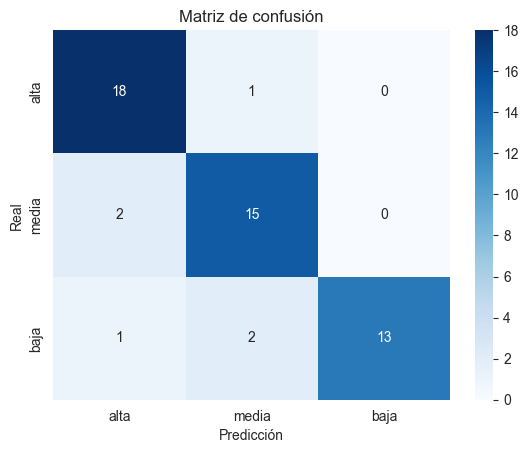

In [6]:
y_pred = modelo.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["alta", "media", "baja"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["alta", "media", "baja"],
            yticklabels=["alta", "media", "baja"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


Probar con nuevas tareas

In [7]:
nuevas_tareas = [
    "instalar actualizaciones del sistema",
    "preparar café",
    "organizar archivos del proyecto"
]

modelo.predict(nuevas_tareas)


array(['alta', 'media', 'media'], dtype='<U5')

Probar otro modelo (Logistic Regression)

In [8]:
from sklearn.linear_model import LogisticRegression

modelo_lr = Pipeline([
    ('vectorizador', CountVectorizer()),
    ('clasificador', LogisticRegression(solver='lbfgs', max_iter=1000))  # max_iter=1000 para asegurar convergencia
])

modelo_lr.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)

print("Reporte con Logistic Regression:")
print(classification_report(y_test, y_pred_lr, zero_division=1))


Reporte con Logistic Regression:
              precision    recall  f1-score   support

        alta       0.82      0.95      0.88        19
        baja       0.93      0.88      0.90        16
       media       0.93      0.82      0.88        17

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.89        52
weighted avg       0.89      0.88      0.88        52



 Guardar modelo con joblib

In [9]:
import joblib

joblib.dump(modelo_lr, "clasificador_prioridad.pkl")


['clasificador_prioridad.pkl']

Cargar modelo guardado

In [10]:
modelo_cargado = joblib.load("clasificador_prioridad.pkl")

# Probar
modelo_cargado.predict(["hacer backup del servidor"])


array(['alta'], dtype=object)

validación cruzada

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_lr, X, y, cv=5)
print(f"Scores en validación cruzada: {scores}")
print(f"Precisión promedio: {scores.mean():.2f}")


Scores en validación cruzada: [0.6        0.76470588 0.88235294 0.91176471 0.94117647]
Precisión promedio: 0.82


Visualización de pesos por palabra

In [12]:
# Extraer coeficientes del modelo
vectorizador = modelo_lr.named_steps['vectorizador']
clasificador = modelo_lr.named_steps['clasificador']

palabras = vectorizador.get_feature_names_out()
pesos = clasificador.coef_

for i, clase in enumerate(clasificador.classes_):
    top_palabras = sorted(zip(pesos[i], palabras), reverse=True)[:5]
    print(f"\nPalabras más influyentes para la clase '{clase}':")
    for peso, palabra in top_palabras:
        print(f"{palabra}: {peso:.2f}")



Palabras más influyentes para la clase 'alta':
seguridad: 0.90
la: 0.72
software: 0.65
presentación: 0.59
revisa: 0.53

Palabras más influyentes para la clase 'baja':
leer: 0.96
ver: 0.92
en: 0.83
buscar: 0.76
descargar: 0.58

Palabras más influyentes para la clase 'media':
revisar: 0.78
actualizar: 0.61
lista: 0.61
reunión: 0.58
supervisar: 0.55
